## Problem Statements:
### We want predict Passenger ticket sales

### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

import warnings
warnings.filterwarnings('ignore')

### Reading the csv file

In [2]:
air_data = pd.read_excel("Airlines+Data.xlsx")
air_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


### Checking null values

In [3]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


### Check in the statistics terms to get basic ideas

In [4]:
air_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


### Performing the basic visualization to identify the past trend and perform analytics on the data

<AxesSubplot:>

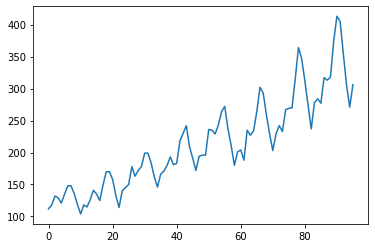

In [5]:
air_data.Passengers.plot()

<AxesSubplot:ylabel='Density'>

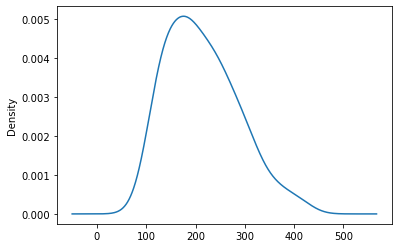

In [6]:
air_data.Passengers.plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

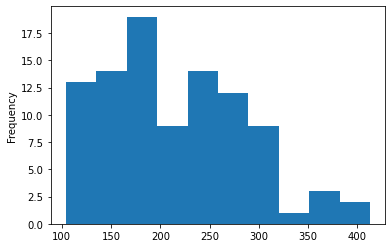

In [7]:
air_data.Passengers.plot(kind='hist')

In [8]:
v=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)

### Box plot to visualize the passengers in airlines for each year and identify the presence of any outliers

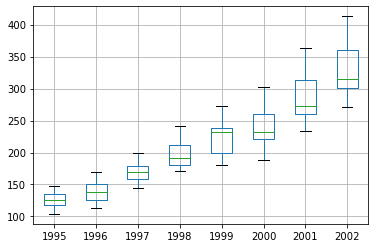

In [9]:
group=v.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for i,j in group:
    years[i.year]=j.values
years.boxplot()
plt.show()

### Lag plot - plot between lagges values of airline passengers and lagged time

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

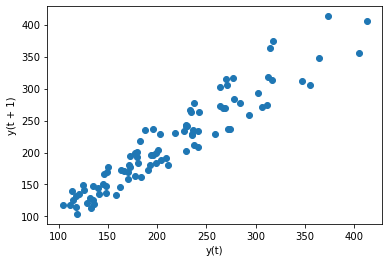

In [10]:
lag_plot(v)

## Performing the data driven methods on the dataset

### Splitting data

In [11]:
train = air_data.head(77)
test = air_data.tail(19)

### Moving Average and time decomposition plot¶

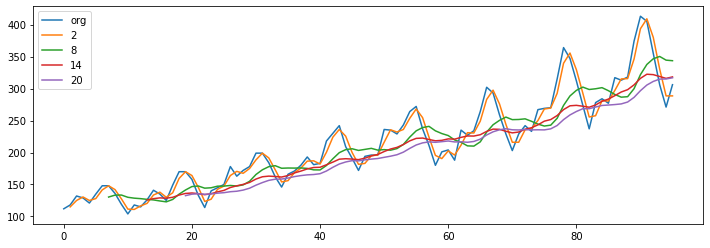

In [12]:
plt.figure(figsize=(12,4))
air_data.Passengers.plot(label="org")
for i in range(2,24,6):
    air_data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

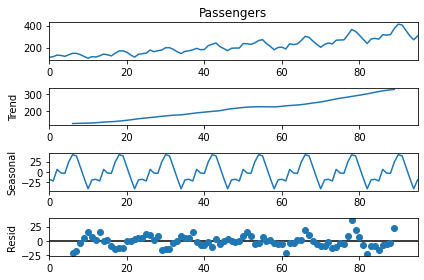

In [13]:
decompose_ts_add = seasonal_decompose(air_data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots


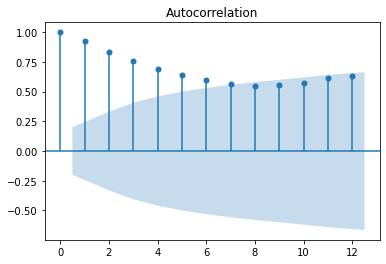

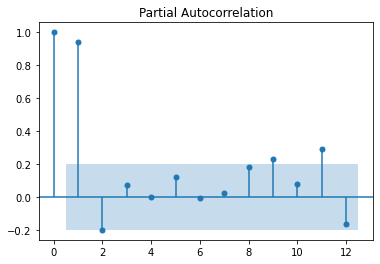

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air_data.Passengers,lags=12)
tsa_plots.plot_pacf(air_data.Passengers,lags=12)
plt.show()

### Evaluation metric RMSE

In [15]:
def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

### Developing the model of simple exponential method

In [16]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_ses,test.Passengers) 


80.54332901444145

### Developing the model of Holt method 

In [17]:
# Holt method 
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hw,test.Passengers) 

47.877728640303836

### Developing the model of Holts winter exponential smoothing with additive seasonality and additive trend


In [18]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hwe_add_add,test.Passengers) 

35.89943165716678

### Developing the model of Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [19]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
RMSE(pred_hwe_mul_add,test.Passengers)

30.902016269679834

### Final model by combining train and test

In [20]:
hwe_model_mul_add_new = ExponentialSmoothing(air_data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

### Forecasting for next 10 time periods

In [21]:
hwe_model_mul_add_new.forecast(10)

96     312.899768
97     308.171843
98     355.533483
99     345.770653
100    345.697050
101    392.471899
102    436.502735
103    429.860677
104    380.174322
105    332.318746
dtype: float64

## Conclusion:
### From the above models, the model with the lowest RMSE value is holts winter exponential smoothing with multiplicative seasonality and additive trend. Thus, we use it to forecast the airlines passengers using the same model